<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных:" data-toc-modified-id="Загрузка-и-предобработка-данных:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка данных:</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка и предобработка данных:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
display('Общий вид датафрейма:', data.head(5))
print()
print(data.info())
print()
display(data.describe())
print()
display('Кол-во строк, столбцов датафрейма:', data.shape)
print()
display('Кол-во явных дубликатов:', data.duplicated().sum())
print()
display('Кол-во пропусков в данных:', data.isna().sum())

'Общий вид датафрейма:'

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


'Кол-во строк, столбцов датафрейма:'

(5000, 5)

'Кол-во явных дубликатов:'

153

'Кол-во пропусков в данных:'

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

**Пропуски данных в датафрейме отсутствуют.**

**Выявлено 153 явных дубликата** - совпадают столбцы "пол", "возраст", "зарплата", "члены семьи", "страховые выплаты".  
В текущих условиях (при имеющемся объеме данных) невозможно сделать однодзначный вывод о том, являются ли указанные значения дубликатами, т.к. **возможно совпадение одинаковых условий для разных клиентов.**

In [4]:
print(data[data.duplicated()].sort_values(by='Зарплата'))

      Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
2988    1     32.0   21600.0            0                  0
2869    0     50.0   24700.0            1                  2
4230    0     32.0   25600.0            1                  0
2723    0     36.0   26400.0            0                  0
1140    1     34.0   26900.0            0                  0
...   ...      ...       ...          ...                ...
3150    0     23.0   53600.0            1                  0
1281    1     24.0   53900.0            2                  0
2465    0     40.0   54000.0            2                  0
2231    0     33.0   59300.0            2                  0
1742    1     28.0   59900.0            0                  0

[153 rows x 5 columns]


**В столбцах "Зарплата" и "Возраст" все значения после точки (копейки) имеют "нулевой" показатель, в связи с чем, целесообразно перевести значения в формат "Int" (целочисленные):**

In [5]:
#print(data['Зарплата'].unique())
#print(data['Возраст'].unique())
data[['Зарплата', 'Возраст']] = data[['Зарплата', 'Возраст']].astype('int')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB
None


**Рассмотрим распределение данных по столбцам:**

0    2505
1    2495
Name: Пол, dtype: int64

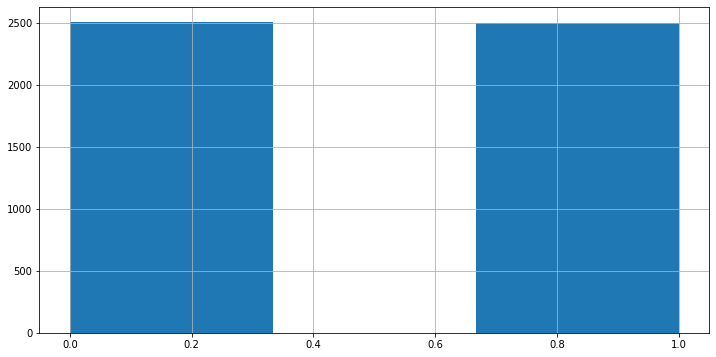

In [6]:
data['Пол'].hist(bins=3, figsize=(12,6));
data['Пол'].value_counts()

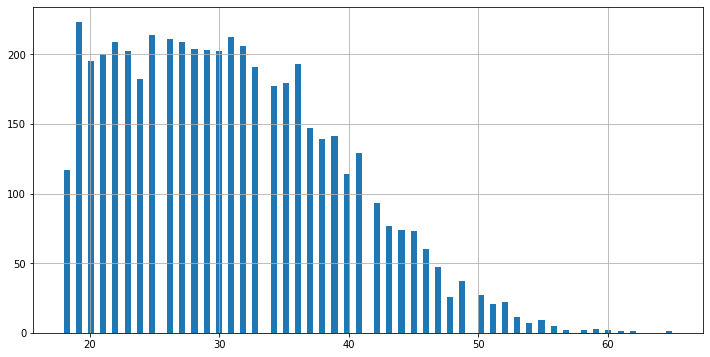

In [7]:
data['Возраст'].hist(bins=100, figsize=(12,6));

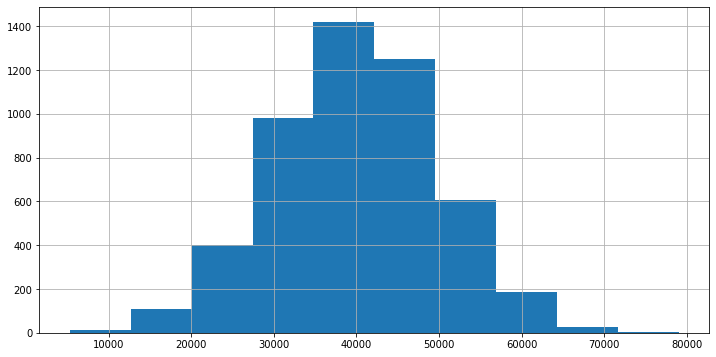

In [8]:
data['Зарплата'].hist(bins=10, figsize=(12,6));

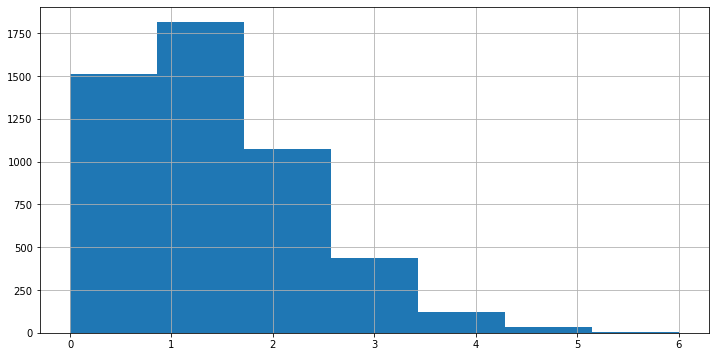

In [9]:
data['Члены семьи'].hist(bins=7, figsize=(12,6));

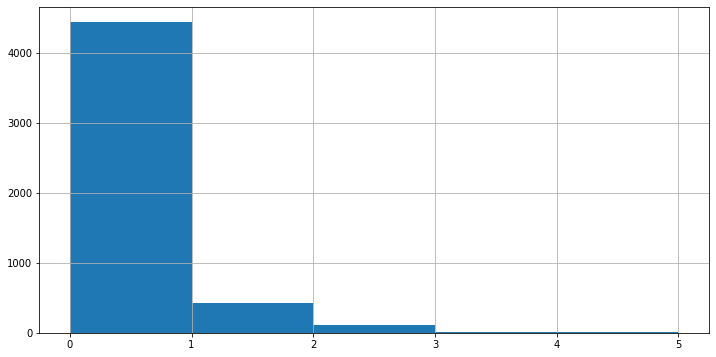

In [10]:
data['Страховые выплаты'].hist(bins=5, figsize=(12,6));

**Первичным анализом установлено:**  
- пропуски в данных отсутствуют;
- выявлены дубликаты данных (3% от общего количества данных), удаление нецелесообразно;
- данные распределены нормально, выбросы (аномалии) отсутствуют;
- клиентов одного пола на 10 чел. больше, чем другого;
- основной возраст клиентов от 18 до 37 лет (средний, медианный возраст 30 лет);
- средняя и медианная зарплата клиентов 40 тыс.руб.;
- среднее и медианное кол-во членов семьи - 1 чел.;
- среднее и медианное кол-во страховых выплат - 0.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

# Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Новая матрица признаков "X1" - произведение старой матрицы "X" на обратимую матрицу "P":

$$
X1 = X * P
$$

Формула "w1" при новом значении "X1":

$$
w1 = ((XP)^T * XP)^{-1} * XP^T * y
$$

Раскрытие первого произведения (XP)^T:

$$
w1 = (X^T * P^T * XP)^{-1} * P^T * X^T * y 
$$

Перегруппировка множителей в скобках:

$$
w1 = (P^T * (X^T * X) * P)^{-1} * P^T * X^T * y
$$

Раскрытие скобок:

$$
w1 = P^{-1} * (X^T * X)^{-1} * (P^T)^{-1} * P^T * X^T * y
$$

Так как **P** - обратимая матрица, то произведение **(P^T)^{-1} * P^T** равно **E** (единичная матрица):

$$
w1 = P^{-1} * (X^T * X)^{-1} * EX^T * y = P^{-1} * (X^T * X)^{-1} * X^T * y 
$$

В правой части уравнения образовалась формула для **w**:

$$
w1 = P^{-1} * (X^T * X)^{-1} * X^T * y = P^{-1} * w
$$

Подставим новое значение весов **w1** в формулу для предсказаний линейной регрессии. Предсказания модели расчитываются по формуле:

$$
a = X * w
$$

Подставим в эту формулу значения **X1** и **w1** для того, чтобы на их основе вычислить предсказания модели **a1**:

$$
a1 = X1 * w1 = X * P * P^{-1} * w
$$

Так как **P** по условию обратимая, то произведение **P * P^{-1}** снова равно **E**:

$$
a1 = X * P * P^{-1} * w = X * E * w = X * w = a
$$

Вычисления подтверждают, что предсказания **a1** для матрицы признаков, умноженных на обратимую матрицу **P** равны предсказаниям **a**.  
Следовательно, качество линейной регрессии при умножении признаков на обратимую матрицу не изменится. В данном случае, параметры линейной регрессии в исходной задаче **w** и в преобразованной **w1** связаны следующим образом:

$$
w1 = P^{-1} * w
$$

## Алгоритм преобразования:

**Алгоритм:**

Для защиты пользовательской информации на этапе поиска коэффициентов предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу Y - "random_matrix", которая будет генерироваться случайным образом.

Этапы алгоритма:
- Создание матрицы Y - "random_matrix"
- Проверка матрицы Y - "random_matrix" на обратимость
- Изменение исходных данных следующим случайно выбранным образом:
    - *умножение матрицы на 1000*
    - *вычитание из матрицы 200*
    - *умножение матрицы на 5*
    - *умножение на случайную обратимую матрицу*
- Получение матрицы преобразованных признаков: Z = X * Y, где: Z - "encoded_matrix", X - "features", Y - "random_matrix"
- Применение алгоритма на преобразованных признаках

**Обоснование:** Если умножить исходную матрицу в линейной регрессии на случайную обратимую матрицу, то результаты линейной регрессии не изменятся. Это связано с тем, что умножение матрицы на обратимую матрицу не изменяет ее ранг и свойства, которые необходимы для построения модели линейной регрессии.
  
Для линейной регрессии мы имеем матричную формулу:  
y = X * beta + epsilon  
где:  
y - вектор-столбец откликов,  
X - матрица признаков,  
beta - вектор-столбец коэффициентов модели,  
epsilon - вектор-столбец ошибок.

Если мы умножим матрицу X на обратимую матрицу A, то у нас получится новая матрица X':  
X' = X * A  
  
Тогда исходная формула линейной регрессии примет вид:  
y = X * beta + epsilon = X' * (A^-1 * beta) + epsilon  
где (A^-1 * beta) является новым вектором коэффициентов модели.  
Таким образом, умножение матрицы на обратимую матрицу не меняет свойства исходной модели, и результаты линейной регрессии останутся неизменными.  
  
Данный метод позволяет закодировать персональные данные пользователей. Этот метод позволяет использовать данные в дальнейшем без риска потери качества модели машинного обучения, также утечки персональных данных.

Для восстановления исходных данных, используется обратная матрица: закодированная матрица умножается на обратную матрицу.

**Разбивка выборки на обучающую и тестовую:**

In [11]:
data_train, data_test = train_test_split(data, test_size=0.25, random_state=12345)
features = data_train.drop(['Страховые выплаты'], axis=1)
target = data_train['Страховые выплаты']
features_test = data_test.drop(['Страховые выплаты'], axis=1)
target_test = data_test['Страховые выплаты']
print('Размер выборки "features":', features.shape)
print()
print('Размер выборки "target":', target.shape)
print()
print('Размер выборки "features_test":', features_test.shape)
print()
print('Размер выборки "target_test":', target_test.shape)

Размер выборки "features": (3750, 4)

Размер выборки "target": (3750,)

Размер выборки "features_test": (1250, 4)

Размер выборки "target_test": (1250,)


***Функция для создания случайной матрицы и проверки её обратимости:***

In [12]:
def get_rand_matrix():
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(features.shape[1], features.shape[1]))
        det = np.linalg.det(matrix)
    return matrix

In [13]:
random_matrix = get_rand_matrix()
print(random_matrix)

[[-1.00935292 -1.29245673 -1.21111279 -1.13783745]
 [-0.09135246  1.16806787 -0.8290803  -0.50065627]
 [ 0.85508099  0.30118328  0.45503143  0.31674277]
 [ 1.43316673 -0.7439136   0.1783834  -2.43825823]]


***Изменение исходных данных:***

In [14]:
features_new = ((features * 1000 - 200) * 5) @ random_matrix
print(features_new.head())
features_new.shape

                 0             1             2             3
3369  1.547509e+08  5.475569e+07  8.217868e+07  5.720868e+07
1441  2.462416e+08  8.693346e+07  1.309035e+08  9.113488e+07
571   1.757105e+08  6.207690e+07  9.337860e+07  6.500210e+07
225   1.928103e+08  6.812393e+07  1.024627e+08  7.132694e+07
2558  2.163336e+08  7.638523e+07  1.149893e+08  8.003269e+07


(3750, 4)

***Получение матрицы преобразованных признаков:***

In [15]:
encoded_matrix = np.dot(features_new, random_matrix)
print(encoded_matrix)

[[-8.94138698e+06 -1.53858010e+08 -1.85218759e+08 -3.16955237e+08]
 [-1.39416904e+07 -2.45082920e+08 -2.94478984e+08 -5.04454288e+08]
 [-1.00196681e+07 -1.74820063e+08 -2.10186479e+08 -3.59924096e+08]
 ...
 [-1.09482095e+07 -1.90081260e+08 -2.28629864e+08 -3.91415981e+08]
 [-1.21585561e+07 -2.13250160e+08 -2.56121075e+08 -4.38712543e+08]
 [-9.83106597e+06 -1.73642231e+08 -2.08560409e+08 -3.57350977e+08]]


**Ответ:** Предсказание останется прежним, качество линейной регрессии не изменится: исходная матрица умножается на случайную обратимую матрицу (высота случайной матрицы должна быть равно ширине исходной матрицы; ширина случайной матрицы должна быть равна ее высоте).

## Проверка алгоритма:

**Для проверки алгоритма используем модель Линейной регрессии:**

*Функция для предсказания модели и вычисления r2_score:*

In [16]:
def Predict_and_R2(features, target):
    model = LinearRegression()
    model.fit(features, target)
    R2 = model.score(features, target)
    return R2

*Вычисление r2_score на исходной матрице:*

In [17]:
Predict_and_R2(features, target)

0.42139202519255015

*Вычисление r2_score на матрице с измененными исходными данными:*

In [18]:
print(Predict_and_R2(features_new, target))

0.4213920251925577


*Вычисление r2_score на матрице с преобразованными признаками:*

In [19]:
print(Predict_and_R2(encoded_matrix, target))

0.4213920251925236


**Качество линейной регрессии не меняется.**  

## Вывод:

Проведенным анализом установлено следующее:
- В исследовании использовался датасет длинной 5000 строк, содержащий следующую информацию: пол, возраст, зарплата, кол-во членов семьи, страховые выплаты.
- Предобработкой данных установлено, что:
    - пропуски в данных отсутствуют;
    - выявлены дубликаты данных (3% от общего количества данных), удаление нецелесообразно;
    - данные распределены нормально, выбросы (аномалии) отсутствуют;
    - клиенты распределены почти поровну между мужчинами и женщинами;
    - средний возраст клиента - 30 лет;
    - средняя зарплата клиента 40 тыс. руб.
- Проведенными вычислениями установлено, что предсказания "a1" для матрицы признаков, умноженных на обратимую матрицу "P" равны предсказаниям "a", следовательно, качество линейной регрессии при умножении признаков на обратимую матрицу не изменится.
- Создан и обоснован один из вариантов алгоритма защиты пользовательской информации, включающий следующие этапы:
    - Создание матрицы Y - "random_matrix"
    - Проверка матрицы Y - "random_matrix" на обратимость
    - Изменение исходных данных следующим случайно выбранным образом (умножение матрицы на 1000 / вычитание из матрицы 200 / умножение матрицы на 5 / умножение на случайную обратимую матрицу)
    - Получение матрицы преобразованных признаков: Z = X * Y, где: Z - "encoded_matrix", X - "features", Y - "random_matrix"
    - Применение алгоритма на преобразованных признаках
- Алгоритм проверен на модели Линейной регрессии - качество предсказаний модели не изменилось.
